# Opiod Model Using Tau Hybdrid

### Imports

In [2]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model based off the prescription opiod crisis in the United States. Based off a paper from the University of Tennessee
https://0afa17f2-bd49-4985-b62b-358fb4a6bf3f.filesusr.com/ugd/f70b03_22c7703e4a3b4da6b9555c738ed8566d.pdf

In [3]:
import gillespy2

class Opiod(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Opioid")
            
            #parameters
            alpha = gillespy2.Parameter(name='alpha', expression= 0.15) #0.15
            epsilon = gillespy2.Parameter(name='epsilon', expression= 0.8) #0.8-8
            beta_p = gillespy2.Parameter(name='beta_p', expression= 0.00266) #0.00266
            beta_a = gillespy2.Parameter(name='beta_a', expression= 0.00094) #0.00094
            gamma = gillespy2.Parameter(name='gamma', expression= 0.00744) #00744
            zeta = gillespy2.Parameter(name='zeta', expression= 0.2) #0.2-2
            delta = gillespy2.Parameter(name='delta', expression= 0.1) #0.1
            sigma = gillespy2.Parameter(name='sigma', expression= 0.9) #0.9
            mu = gillespy2.Parameter(name='mu', expression= 0.00729)  #0.00729
            mu_prime = gillespy2.Parameter(name='mu_prime', expression= 0.01159) #0.01159
            
         
            self.add_parameter([alpha,epsilon,beta_p,beta_a,gamma,zeta,delta,sigma,mu, mu_prime])
            
            #Species
            S = gillespy2.Species(name='Susceptibles', initial_value=1000)
            P = gillespy2.Species(name='Prescribed_Users', initial_value=0)
            A = gillespy2.Species(name='Addicted', initial_value=0)
            R = gillespy2.Species(name='Rehab', initial_value=0)
            Natural_Deaths = gillespy2.Species(name='Natural_Deaths',initial_value=0)
            Addiction_Deaths = gillespy2.Species(name='Addiction_Deaths',initial_value=0)
            self.add_species([S,P,A,R,Natural_Deaths,Addiction_Deaths])
            
            #reactions
            SP = gillespy2.Reaction(name="SP",reactants={S:1}, products={P:1},
                   rate=alpha)
            
            SA_a = gillespy2.Reaction(name="SA_a",reactants={S:1}, products={A:1},
                    rate=beta_a)
            
            SA_p = gillespy2.Reaction(name="SA_p",reactants={S:1}, products={A:1},
                    rate=beta_p)
            
            mu_S = gillespy2.Reaction(name="mu_S",reactants={S:1},products={S:1,Natural_Deaths:1},
                    rate = mu)
            
            PA = gillespy2.Reaction(name="PA",reactants={P:1}, products={A:1},
                    rate=gamma)
            
            PS = gillespy2.Reaction(name="PS",reactants={P:1}, products={S:1},
                    rate=epsilon)
            
            AR = gillespy2.Reaction(name="AR",reactants={A:1}, products={R:1},
                    rate=zeta)
            
            RA = gillespy2.Reaction(name="RA",reactants={R:1}, products={A:1},
                    rate=delta)
            
            RS = gillespy2.Reaction(name="RS",reactants={R:1}, products={S:1},
                    rate=sigma)
            
            mu_P = gillespy2.Reaction(name="mu_P",reactants={P:1}, products={S:1,Natural_Deaths:1},
                    rate=mu)
            
            mu_R = gillespy2.Reaction(name="m_R",reactants={R:1}, products={S:1,Natural_Deaths:1},
                    rate=mu)
            
            mu_prime_A = gillespy2.Reaction(name="mu_prime_A",reactants={A:1}, products={S:1,Addiction_Deaths:1},
                    rate=mu_prime)
            
            self.add_reaction([SP,PS,SA_a,SA_p,PA,AR,RA,RS,mu_P,mu_R,mu_prime_A,mu_S])
            self.timespan(numpy.linspace(0,100,101))

In [4]:
model = Opiod()


### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [6]:
%time results = model.run(solver=BasicTauHybridSolver, show_labels=True)

CPU times: user 10.4 s, sys: 113 ms, total: 10.5 s
Wall time: 10.5 s


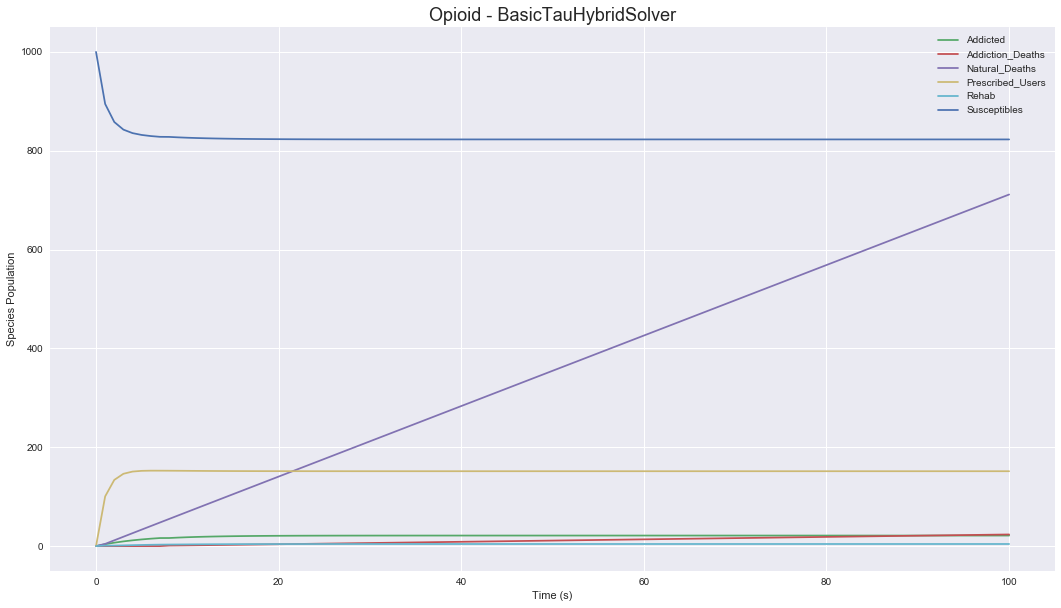

In [7]:
results.plot(style="seaborn")

In [8]:
results.plotplotly()

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="0523ffe4-62f0-4f62-9b6b-4559b4be53df" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    
                if (document.getElementById("0523ffe4-62f0-4f62-9b6b-4559b4be53df")) {
                    Plotly.newPlot(
                        '0523ffe4-62f0-4f62-9b6b-4559b4be53df',
                        [{"line": {"color": "#1f77b4"}, "mode": "lines", "name": "Addicted", "type": "scatter", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [0.0, 3.856484425203893, 6.902055012232656, 9.48658778184165, 11.659611007619922, 13.479012518287442, 14.999576571968287, 16.269239605237548, 16.33428725574034, 17.21497000518384, 17.937270147572608, 18.531626121885363, 19.021404497184673, 19.42525764951751, 19.758435980913816, 20.033441560040174, 20.260327182871833, 20.44751674602091, 20.60195690375892, 20.72937776804558, 20.83450654096967, 20.921243255509875, 20.99280558756502, 21.05184826850078, 21.100561583718417, 21.140752630947635, 21.173912359673917, 21.201270881126067, 21.223843101529383, 21.24246637178596, 21.25783155037774, 21.270508631866633, 21.28096789174054, 21.289597332015738, 21.29671707477205, 21.302591237573544, 21.307437731313836, 21.311436343952707, 21.31473541002369, 21.31745731332827, 21.319703026947884, 21.32155585899287, 21.323084543042118, 21.32434578791868, 21.325386381388775, 21.326244925824213, 21.326953270215203, 21.327537691656516, 21.328019870135687, 21.328417692784495, 21.328745917429053, 21.329016720053367, 21.329240146485713, 21.329424485063672, 21.329576574102415, 21.32970205557227, 21.32980558439595, 21.329891001129926, 21.329961474435684, 21.330019618625883, 21.33006759064614, 21.330107170090276, 21.330139825216964, 21.330166767416912, 21.33018899615132, 21.33020733602838, 21.330222467393206, 21.33023495156636, 21.33024525166695, 21.330253749792607, 21.330260761193987, 21.330266545969536, 21.330271318714132, 21.330275256479894, 21.330278505344097, 21.330281185828255, 21.330283397368895, 21.330285222006438, 21.330286727428536, 21.330287969481084, 21.330288994239872, 21.33028983971988, 21.33029053728542, 21.330291112813757, 21.33029158765493, 21.330291979423933, 21.330292302654016, 21.330292569335867, 21.33029278936243, 21.330292970895915, 21.330293120670618, 21.330293244242647, 21.330293346196093, 21.330293430313077, 21.330293499714006, 21.330293556973405, 21.330293604215452, 21.330293643192622, 21.330293675350827, 21.330293701883, 21.330293723773426]}, {"line": {"color": "#ff7f0e"}, "mode": "lines", "name": "Addiction_Deaths", "type": "scatter", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.082982832391211, 1.277602216162965, 1.4814